In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [ ]:
#lasso uses for atomatic feature selection

In [5]:
df = pd.read_csv("Boston_Housing.csv")
dataset=pd.DataFrame(df)
dataset = df.drop(columns=['Unnamed: 14'])
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
#independent features and dependent features
X=dataset.iloc[:,0:13]
Y=dataset.iloc[:,-1]

In [7]:
##train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state=42)


In [8]:
##standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import Lasso

In [11]:
lasso = Lasso()

In [12]:
parameters={'alpha':[1,2,3,4,5,10,20,30,40,50,60,70,80,90,100]}
lassocv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lassocv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90, 100]},
             scoring='neg_mean_squared_error')

In [13]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-31.153603752119004


In [14]:
lasso_pred = lassocv.predict(X_test)

In [15]:
lasso_pred

array([26.12212011, 30.64819603, 17.74859418, 25.19460935, 19.2946692 ,
       22.82279099, 18.29163625, 14.64075609, 21.39330664, 20.41184791,
       20.63763155, 21.04309429,  1.20212245, 22.48770149, 20.32863075,
       24.82509724, 18.13265187,  6.81250853, 36.09245901, 18.45054869,
       25.64506153, 26.80170403, 13.73714037, 24.01576341, 18.81760059,
       15.4264936 , 22.86865424, 19.00799481, 19.78638284, 19.64740851,
       19.93060152, 25.47637139, 25.2188929 , 19.46825782, 15.87043757,
       20.50660407, 31.02198968, 21.6519024 , 21.52470923, 24.76908959,
       14.39002311, 27.57471172, 36.56725739, 19.58680457, 25.573017  ,
       17.1872521 , 15.93361988, 25.87675365, 19.35466887, 29.59665087,
       23.11788464, 31.50427155, 17.53234012, 25.85419661, 35.21484659,
       22.89869915, 19.39011084, 29.39749368, 24.66544216, 16.65559649,
       25.47892536, 30.80725782, 28.94063044, 18.30751821, 27.60126279,
       14.37892853, 20.05681263, 25.59068988, 28.35700042, 16.00

C:\Users\imahb\AppData\Local\Temp\ipykernel_11008\3025525575.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-lasso_pred)


<Axes: xlabel='MEDV', ylabel='Density'>

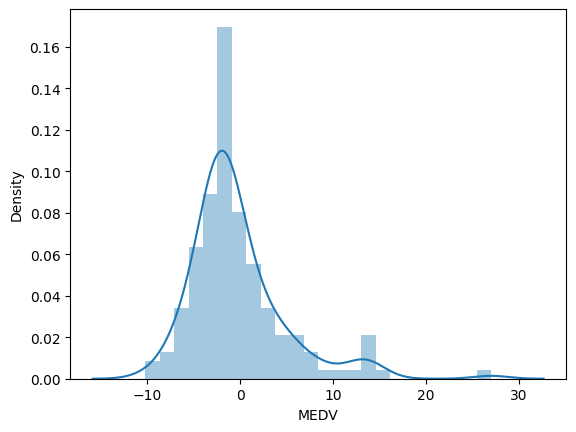

In [16]:
sns.distplot(Y_test-lasso_pred)